# 1. Import Data

In [112]:
#Import Data
import os
import random
import numpy as np
import pandas as pd
import patsy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults
from scipy import stats
import seaborn as sns

diabetes_data = pd.read_csv("/Users/carolinewang/Desktop/diabetes.csv")
diabetes_data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [113]:
diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [114]:
##RESEARCH QUESTION:##
# What are the effects of Diabetes and Age on SkinThickness?
# What is the relationship between Age and Diabetes?

# 2. Data Cleaning and Preprocessing

In [115]:
##Data Cleaning##
#Delete rows that contain SkinThickness = 0.
diabetes_data = diabetes_data.loc[~(diabetes_data['SkinThickness'] == 0)]
diabetes_data
#After data cleaning, the number of rows dropped from 768 to 541

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
..           ...      ...            ...            ...      ...   ...   
761            9      170             74             31        0  44.0   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
3                       0.167   21        0  
4                       2.288   33        1  
6                       0.248   26        1  
..                        ...  ...      ...  
761                     0.403   43        1  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
767                     0.315   23        0  

[541 rows x 9 columns]

In [118]:
#Data Preprocessing
#Add another column that change Diabetes Outcomes from 0 to Non-diabetes and from 1 to Diabetes
Diabetes_Category = pd.cut(diabetes_data.Outcome, bins = [-0.5,0.5,1], labels = ['Non-Diabetes','Diabetes'])
diabetes_data.insert(9,"DiabetesType",Diabetes_Category)

#Classified Age into three categories
#Age                         Category
#21-24                       Youth
#25-64                       Adults
#65-81(since max(Age)=81)    Seniors
Age_Category = pd.cut(diabetes_data.Age, bins = [20,24,64,81], labels = ['Youth','Adults','Seniors'])
#Insert a new column Age Group next to Age
diabetes_data.insert(8,"AgeGroup",Age_Category)

In [119]:
diabetes_data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
..           ...      ...            ...            ...      ...   ...   
761            9      170             74             31        0  44.0   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age AgeGroup  Outcome  DiabetesType  
0                       0.627   50   Adults        1      Diabetes  
1                       0.351   31   Adults        0  Non-Diabetes  
3                       0.167   21    Youth        0  Non-Diabetes  
4                       2.288   33   Adults        1      Diabetes  
6                       0.248   26   Adults        1      Diabetes  
..                        ...  ...      ...      ...           ...  
761                     0.403   43   Adults        1      Diabetes  
763                     0.171   63   Adults        0  Non-Diabetes  
764                     0.340   27   Adults        0  Non-Diabetes  
765                     0.245   30   Adults        0  Non-Diabetes  
767                     0.315   23    Youth        0  Non-Diabetes  

[541 rows x 11 columns]

# 3. Data Analysis

### 3.1 Visualization using scatter plot and box plots

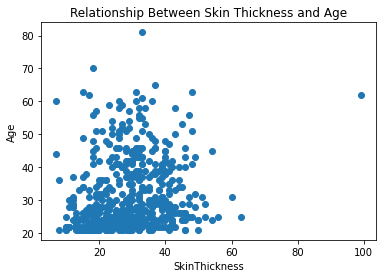

In [9]:
##Visualization##
X = diabetes_data.SkinThickness
Y = diabetes_data.Age
#Use Scatter plot to show the relationship between Skin Thickness and Age
#Scatter Plot 1
plt.title('Relationship Between Skin Thickness and Age')
plt.xlabel('SkinThickness')
plt.ylabel('Age')
plt.scatter(X,Y)

<AxesSubplot:xlabel='AgeGroup', ylabel='SkinThickness'>

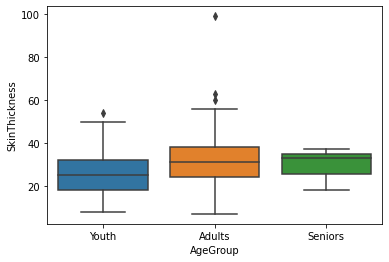

In [10]:
#Use first boxplot to present the skin thickness of different age groups
#Boxplot#1
sns.boxplot(x=diabetes_data["AgeGroup"], y=diabetes_data["SkinThickness"])

<AxesSubplot:xlabel='DiabetesType', ylabel='SkinThickness'>

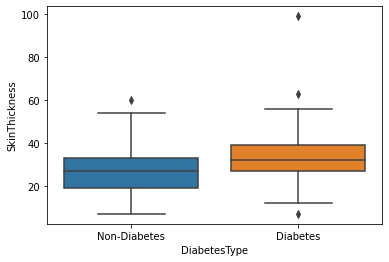

In [11]:
#Use second boxplot to present the skin thickness of people with diabetes and people without diabetes
#Boxplot#2
import seaborn as sns
sns.boxplot(x=diabetes_data["DiabetesType"], y=diabetes_data["SkinThickness"])

<AxesSubplot:xlabel='AgeGroup', ylabel='SkinThickness'>

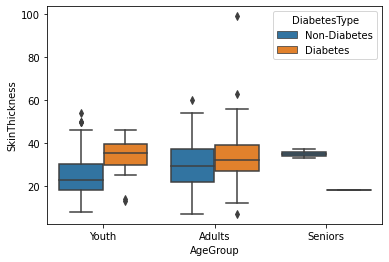

In [12]:
#Create a boxplot that show the distribution of Skin Thinkness for different age groups on the basis of diabetes
sns.boxplot(x=diabetes_data["AgeGroup"], y=diabetes_data["SkinThickness"], hue=diabetes_data["DiabetesType"])

### 3.2 Two-Sample T-test

In [120]:
##T-test##

#Set alpha = 0.05
#H0: The Mean of SkinThickness for People with diabetes and People without diabetes are the same.
#H1: The Mean of SkinThickness for People with diabetes and People without diabetes are different.

import scipy.stats as stats
Skin_Diabetes = diabetes_data.loc[diabetes_data['DiabetesType'] == 'Diabetes', 'SkinThickness'].to_numpy()
Skin_NonDiabetes = diabetes_data.loc[diabetes_data['DiabetesType'] == 'Non-Diabetes', 'SkinThickness'].to_numpy()
t_value, p_value = stats.ttest_ind(Skin_Diabetes, Skin_NonDiabetes)
print("P-Value:{0} T-Statistic:{1}".format(p_value, t_value))
#t = 6.2381345096613465, p = 8.959949134299852e-10
#Since p value is less then alpha, we should reject the null hyphothesis.
#Thus, the Mean of SkinThickness for People with diabetes and People without diabetes are different.

P-Value:8.959949134299852e-10 T-Statistic:6.2381345096613465


Text(0.5, 1.0, 'Two-Sample T-test')

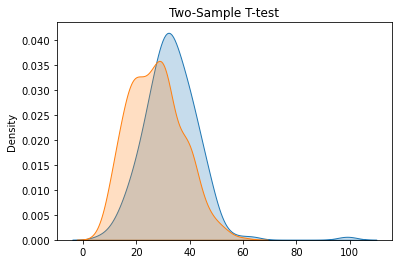

In [14]:
sns.kdeplot(Skin_Diabetes, shade=True)
sns.kdeplot(Skin_NonDiabetes, shade=True)
plt.title("Two-Sample T-test")

### 3.3 Multiple Linear Regression

In [15]:
##Multiple Linear Regression##

#Set x and y
X1 = diabetes_data[['Age','Outcome']]
Y1 = diabetes_data['SkinThickness']
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 100)
#Fitting the Multiple Linear Regression Model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)
#Intercept and Coefficient
print("Intercept:", mlr.intercept_)
print("Coefficients:", list(zip(X1,mlr.coef_)))
#As obtained, Intercept = 23.994126440294153
#Coefficient(Age) = 0.09911796777123802
#Coefficient(Outcome) = 6.336712263451465
#Thus, the equation is: SkinThickness = 23.994126440294153 + (0.09911796777123802*Age) + (6.336712263451465*Outcome) + e

Intercept: 23.994126440294153
Coefficients: [('Age', 0.09911796777123802), ('Outcome', 6.336712263451465)]


### 3.4 Two-way ANOVA test

In [16]:
conda install -c conda-forge pingouin

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::dask-core==2021.10.0=pyhd3eb1b0_0
  - defaults/noarch::jupyterlab_server==2.8.2=pyhd3eb1b0_0
  - defaults/osx-64::jupyter==1.0.0=py39hecd8cb5_7
  - defaults/osx-64::nbconvert==6.1.0=py39hecd8cb5_0
  - defaults/noarch::nbclassic==0.2.6=pyhd3eb1b0_0
  - conda-forge/noarch::pandas-flavor==0.2.0=py_0
  - defaults/osx-64::distributed==2021.10.0=py39hecd8cb5_0
  - defaults/osx-64::notebook==6.4.5=py39hecd8cb5_0
  - conda-forge/noarch::xarray==2022.3.0=pyhd8ed1ab_0
  - defaults/noarch::sphinx==4.2.0=pyhd3eb1b0_1
  - defaults/noarch::numpydoc==1.1.0=pyhd3eb1b0_1
  - defaults/osx-64::pytest==6.2.4=py39hecd8cb5_2
  - defaults/noarch::bleach==4.0.0=pyhd3eb1b0_0
  - defaults/osx-64::anaconda==2021.11=py39_0
  - defaults/osx-64::_ipyw_jlab_nb_ext_conf==0.1.0=py39hecd8cb5_0
  - defaults/osx-64::scikit-image==0.18.3=py39hae1ba45_0

In [17]:
##ANOVA##
#Use Two-way ANOVA to determine whether Diabetes and Age have a significant effect on SkinThickness,
#and to determine whether there is any interaction effect between Diabetes and Age.

#Perform two-way ANOVA
from pingouin import anova
anova(data=diabetes_data,dv='SkinThickness',between=['AgeGroup','DiabetesType'],effsize="n2")

Source            SS     DF           MS          F  \
0                 AgeGroup   1291.414712    2.0   645.707356   6.487002   
1             DiabetesType   2322.209336    1.0  2322.209336  23.329727   
2  AgeGroup * DiabetesType    738.398102    2.0   369.199051   3.709103   
3                 Residual  53253.173336  535.0    99.538642        NaN   

      p-unc        n2  
0  0.001646  0.022418  
1  0.000002  0.040312  
2  0.025132  0.012818  
3       NaN       NaN

#### Post-hoc test for ANOVA

In [20]:
pip install scikit_posthocs

     |████████████████████████████████| 43 kB 840 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37903 sha256=d0659bca0e1068327965942a72b229a3d1f0d45e59955240d017be5ef1df0b5f
  Stored in directory: /Users/carolinewang/Library/Caches/pip/wheels/9d/b3/0e/48fc4edf03f0cace0bb10215f6103591b62f143ace946c193c
Successfully built scikit-posthocs
Note: you may need to restart the kernel to use updated packages.


In [21]:
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

In [24]:
#Post-hoc test 1
sp.posthoc_ttest(diabetes_data, val_col='SkinThickness', group_col='AgeGroup', p_adjust='holm')

Adults         Youth  Seniors
Adults   1.000000e+00  4.636130e-07      1.0
Youth    4.636130e-07  1.000000e+00      1.0
Seniors  1.000000e+00  1.000000e+00      1.0

In [25]:
#Post-hoc test 2
sp.posthoc_ttest(diabetes_data, val_col='SkinThickness', group_col='DiabetesType', p_adjust='holm')

Diabetes  Non-Diabetes
Diabetes      1.000000e+00  8.959949e-10
Non-Diabetes  8.959949e-10  1.000000e+00

### 3.5 ANCOVA test

In [41]:
#Building ancova model 1
from pingouin import ancova
ancova(data=diabetes_data,dv='SkinThickness',covar='BMI',between='AgeGroup',effsize="n2")

Source            SS   DF           F         p-unc        n2
0  AgeGroup    609.138091    2    4.673939  9.718502e-03  0.010701
1       BMI  21321.115028    1  327.195386  1.837086e-57  0.374561
2  Residual  34992.665746  537         NaN           NaN       NaN

In [29]:
#Building ancova model 2
from pingouin import ancova
ancova(data=diabetes_data,dv='SkinThickness',covar='BMI',between='DiabetesType',effsize="n2")

Source            SS   DF           F         p-unc        n2
0  DiabetesType    274.649068    1    4.182652  4.132570e-02  0.004943
1           BMI  19955.831381    1  303.908915  2.756218e-54  0.359192
2      Residual  35327.154769  538         NaN           NaN       NaN

### 3.6 Power Analysis

In [52]:
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower

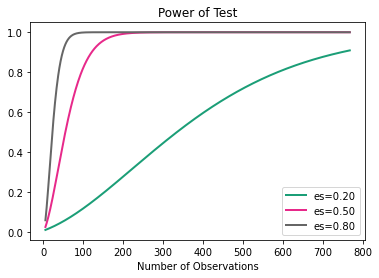

In [104]:
# Power curves for varying effect size
# When alpha = 0.01
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', 
                    nobs=array(range(5, 768)), 
                    effect_size=array([0.2, 0.5, 0.8]), 
                    alpha=0.01)
pyplot.show()

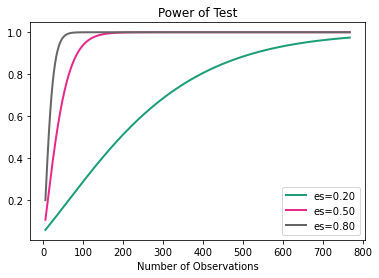

In [105]:
# Power curves for varying effect sizes
# When alpha = 0.05
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', 
                    nobs=array(range(5, 768)), 
                    effect_size=array([0.2, 0.5, 0.8]), 
                    alpha=0.05)
pyplot.show()

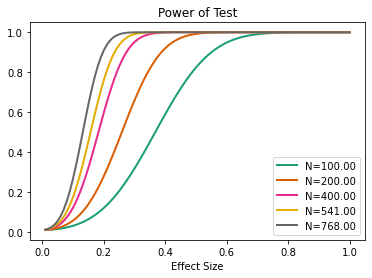

In [106]:
# Power curves for varying sample sizes
# When alpha = 0.01
analysis = TTestIndPower()
analysis.plot_power(dep_var='es', 
                    effect_size=np.linspace(0.01,1,100), 
                    nobs=array([100,200,400,541,768]), 
                    alpha=0.01)
pyplot.show()

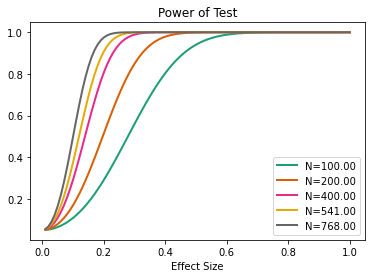

In [107]:
# Power curves for varying sample sizes
# When alpha = 0.05
analysis = TTestIndPower()
analysis.plot_power(dep_var='es', 
                    effect_size=np.linspace(0.01,1,100), 
                    nobs=array([100,200,400,541,768]), 
                    alpha=0.05)
pyplot.show()

In [96]:
conda install -c plotly plotly=5.7.0

Solving environment: done

## Package Plan ##

  environment location: /Users/carolinewang/opt/anaconda3

  added / updated specs:
    - plotly=5.7.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.3.29  |       hecd8cb5_0         118 KB
    plotly-5.7.0               |             py_0         6.9 MB  plotly
    tenacity-8.0.1             |   py39hecd8cb5_0          33 KB
    ------------------------------------------------------------
                                           Total:         7.1 MB

The following NEW packages will be INSTALLED:

  plotly             plotly/noarch::plotly-5.7.0-py_0
  tenacity           pkgs/main/osx-64::tenacity-8.0.1-py39hecd8cb5_0

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2021.10.~ --> pkgs/main::ca-certificates-2022.3.29-hecd8cb5_0



tenacity-8.0.1       | 33 KB     | ########

In [103]:
import plotly.graph_objects as go
@np.vectorize
def power_grid(x,y):
    power = TTestIndPower().solve_power(effect_size = x, 
                                        nobs1 = y, 
                                        alpha = 0.05)
    return power

X,Y = np.meshgrid(np.linspace(0.01, 1, 51), 
                  np.linspace(10, 1000, 100))
X = X.T
Y = Y.T

Z = power_grid(X, Y)

fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])

fig.update_layout(title='3D Power Analysis',scene = dict(xaxis = dict(title='effect size'),
                 yaxis = dict(title='sample size'),
                 zaxis = dict(title='power'),))

fig.show()